# Part 4. 시각화 도구

## 1. Matplotlib - 기본 그래프 도구

그래프를 이용하면 데이터의 구조와 패턴을 파악하기 용이하며, 다양한 관점에서 데이터에 관한 통찰력을 제공한다.

### 1-1. 선 그래프

연속하는 데이터 값들을 직선 또는 곡선으로 연결해 데이터 값 사이의 관계를 나타낸다.  
특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.
  
* 기본 사용법


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [2]:
df = df.fillna(method = 'ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [3]:
sr_one = df_seoul.loc['경기도']

sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

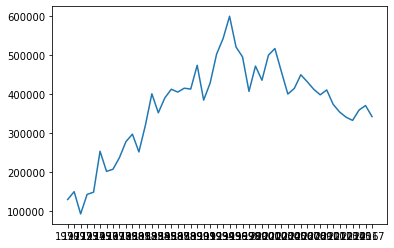

In [4]:
plt.plot(sr_one.index, sr_one.values)

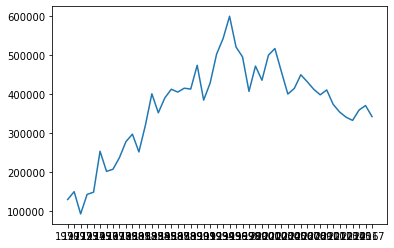

In [5]:
plt.plot(sr_one)

* 차트 제목, 축 이름 추가  

차트 제목 추가: title()  
x축 이름: xlabel()  
y축 이름: ylabel()

In [6]:
# 폰트 오류 발생

# plt.plot(sr_one.index, sr_one.values)

# plt.title('서울 -> 경기 인구 이동')
# plt.xlabel('기간')
# plt.ylabel('이동 인구수')

# plt.show() 

* Matplotlib 한글 폰트 오류 문제 해결

In [7]:
from matplotlib import font_manager, rc

font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

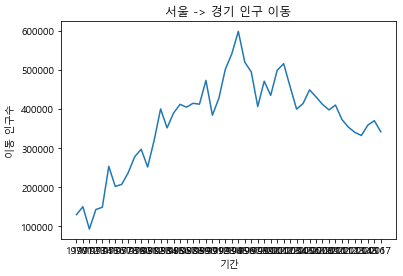

In [8]:
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # x축 눈금 라벨의 글씨가 겹친다. -> 공간 확보 필요

* 그래프 꾸미기  

글씨가 들어갈 수 있는 공간을 확보하기 위한 방법
1) figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정  
2) xticks() 함수로 x축 눈금 라벨을 반시계 방향으로 90도 회전시키기

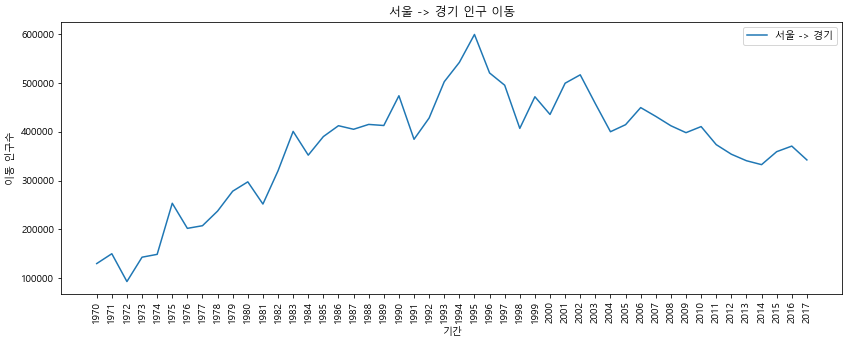

In [9]:
plt.figure(figsize=(14, 5)) # 가로 14인치, 세로 5인치
plt.xticks(rotation='vertical') # x축 눈금 라벨 회전 (각도를 나타내는 숫자를 입력해도 됨(반시계))
 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels = ['서울 -> 경기'], loc = 'best') # 범례 표시
plt.show()

> **Matplotlib 스타일 서식의 종류**  
>  
> * 스타일의 종류: 'classic', 'bmh', 'dark_background', 'fast', 'grayscale', 'seaborn' 등  
> (plt.style.available)로 확인 가능

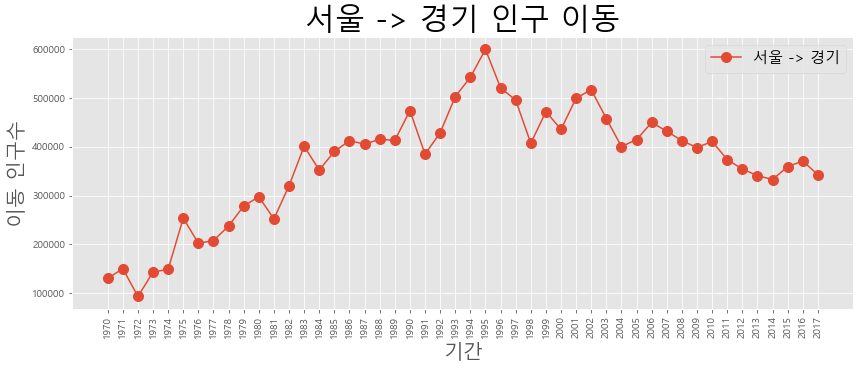

In [10]:
plt.style.use('ggplot') # 스타일 서식 지정

plt.figure(figsize=(14, 5))
plt.xticks(rotation=90) 
 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) 
plt.show()

annotate() - 주석 내용을 넣을 위치와 정렬 방법 등  
arrowprops 옵션: 텍스트 대신 화살표 표시 (화살표 스타일, 시작점과 끝점의 좌표)
rotation 옵션: 양(+)의 회전 방향은 반시계방향  
va 옵션: 글자를 위아래 세로 방향으로 정렬  
ha 옵션: 글자를 가로 방향으로 정렬


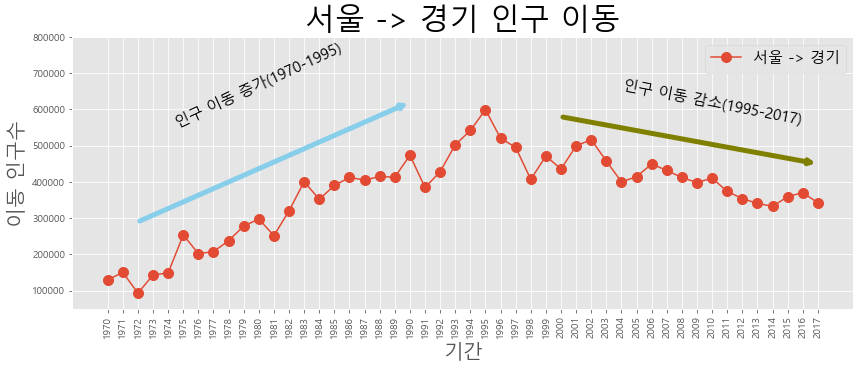

In [11]:
plt.style.use('ggplot') # 스타일 서식 지정

plt.figure(figsize=(14, 5))
plt.xticks(rotation=90) 
 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) 

plt.ylim(50000, 800000) # y축 범위 지정

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20, 620000),          # 화살표의 머리 부분(끝점)
            xytext=(2, 290000),       # 화살표의 꼬리 부분(시작점)
            xycoords='data',          # 좌표체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))

plt.annotate('',
            xy=(47, 450000),          # 화살표의 머리 부분(끝점)
            xytext=(30, 580000),       # 화살표의 꼬리 부분(시작점)
            xycoords='data',          # 좌표체계
            arrowprops=dict(arrowstyle='->', color='olive', lw=5))

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
            xy=(10, 550000),
            rotation=25,
            va='baseline',
            ha='center',
            fontsize=15)

plt.annotate('인구 이동 감소(1995-2017)',
            xy=(40, 560000),
            rotation=-11,
            va='baseline',
            ha='center',
            fontsize=15)

plt.show()

* 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용  

여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정한다.  
axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.  
한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용하면 좋다.

C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/230171930.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/230171930.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


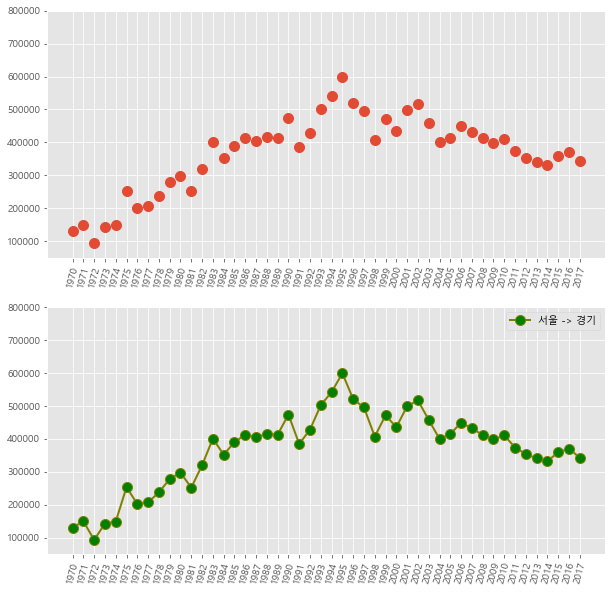

In [12]:
fig = plt.figure(figsize=(10, 10)) # 그림틀의 크기 설정

ax1 = fig.add_subplot(2, 1, 1) # 행의 크기, 열의 크기, 서브플롯 순서
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize=10) # 점만 표시
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기') # 선과 점 표시
ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

**선 그래프의 꾸미기 옵션**  
  
꾸미기 옵션 | 설명
------------|------
'o' | 선 그래프가 아니라 점 그래프로 표현
marker='o' | 마커 모양
markerfacecolor='green' | 마커 배경색
markersize=10 | 마커 크기
color='olive' | 선의 색
linewidth=2 | 선의 두께
label='서울 -> 경기' | 라벨 지정

C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2158456661.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


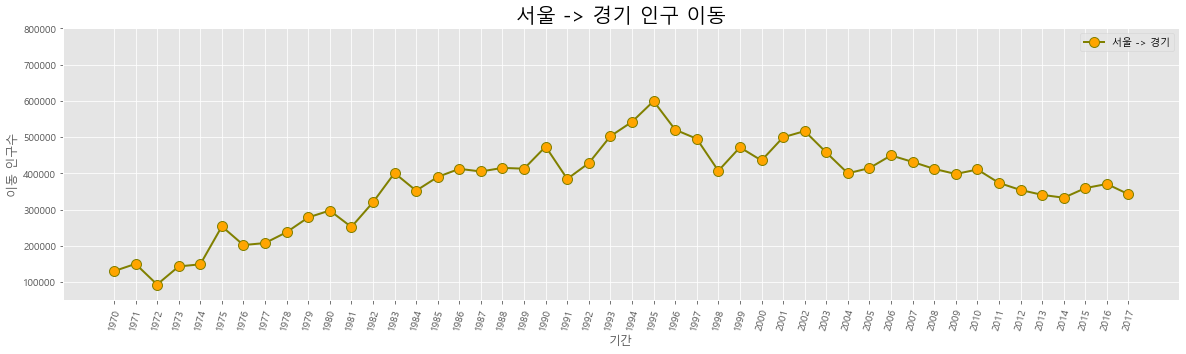

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
       color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

ax.set_ylim(50000, 800000)
ax.set_title('서울 -> 경기 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(sr_one.index, rotation=75)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/4227325116.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


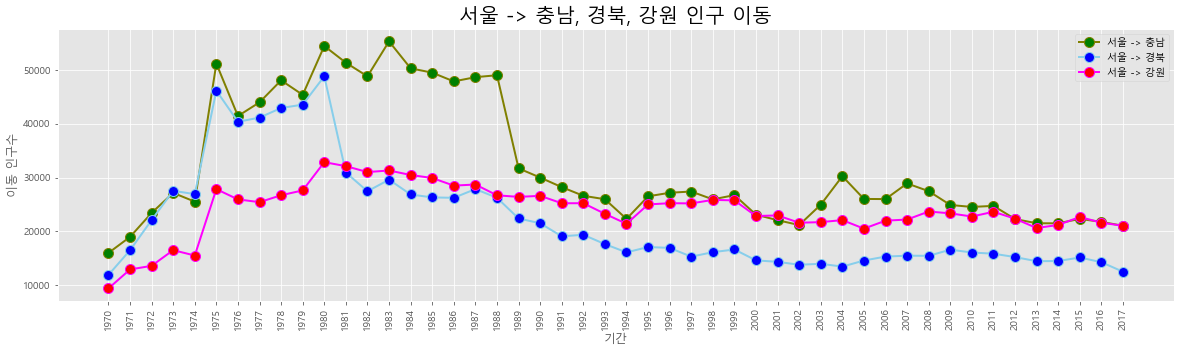

In [14]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1) # 동일한 그림에 여러 개의 그래프를 추가

ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=10,
       color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=10,
       color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red', markersize=10,
       color='magenta', linewidth=2, label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2533841379.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2533841379.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2533841379.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2533841379.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


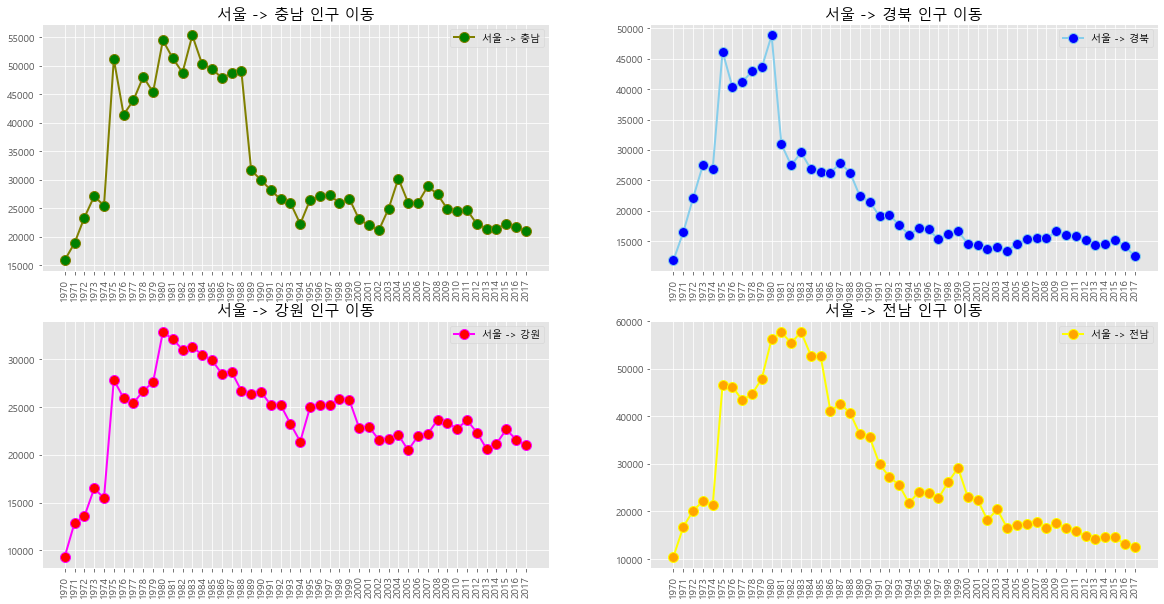

In [15]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=10,
       color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=10,
       color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='red', markersize=10,
       color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='orange', markersize=10,
       color='yellow', linewidth=2, label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

> Matplotlib 에서 사용할 수 있는 색의 종류

In [16]:
import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 1-2. 면적 그래프

==> kind = 'area' 옵션 추가  

선 그래프와 x축 사이의 공간에 색이 입혀지며, 투명도(alpha)는 기본값 0.5로 투과되어 보인다.  

stack = True 옵션: 그래프 누적 - 각 열의 선그래프가 다른 열의 선 그래프 위로 쌓아 올려진다.  


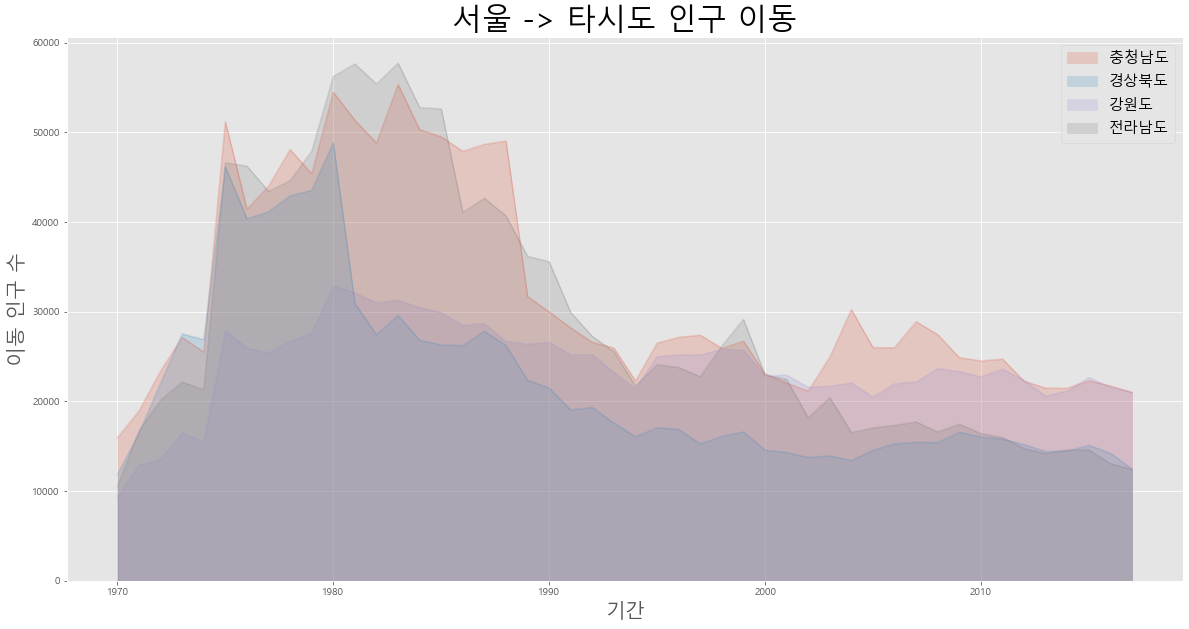

In [17]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

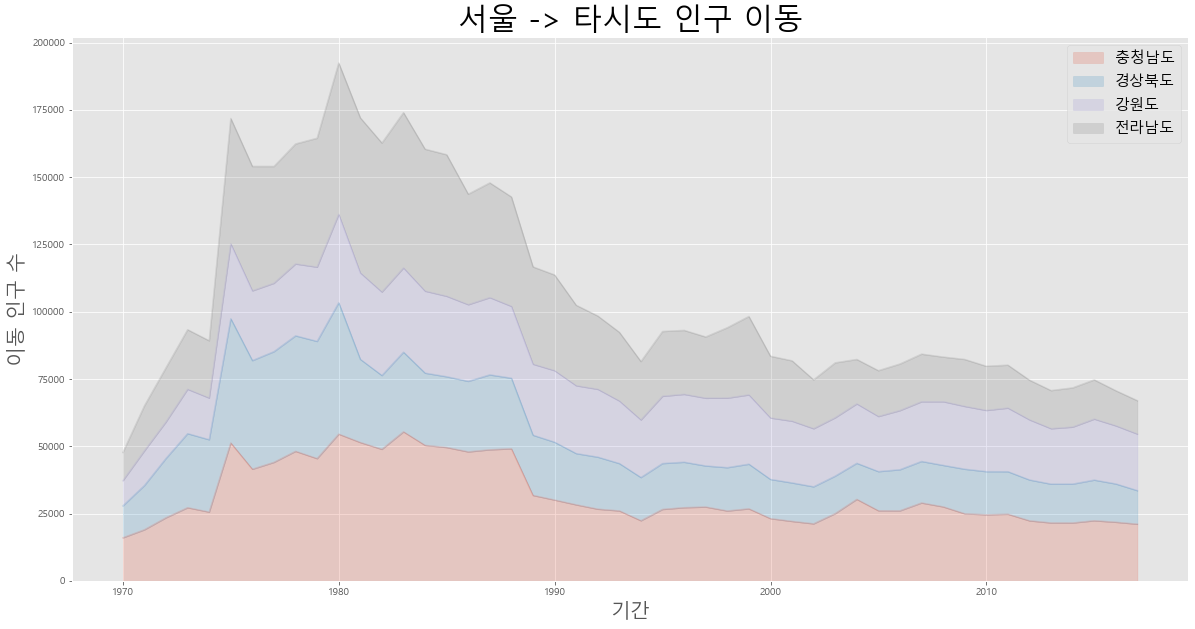

In [18]:
plt.style.use('ggplot')

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


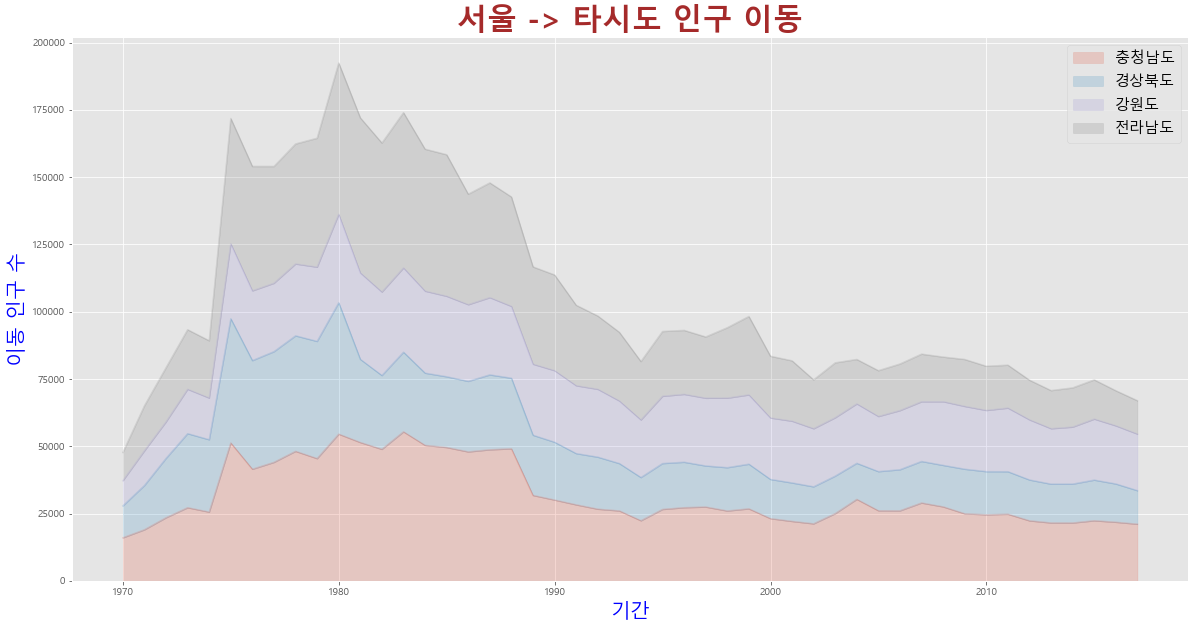

In [19]:
# axe 객체(ax)의 세부적인 요소 결정

ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 1-3. 막대 그래프

==> 세로형: kind = 'bar' 옵션 추가  
==> 가로형: kind = 'barh' 옵션 추가

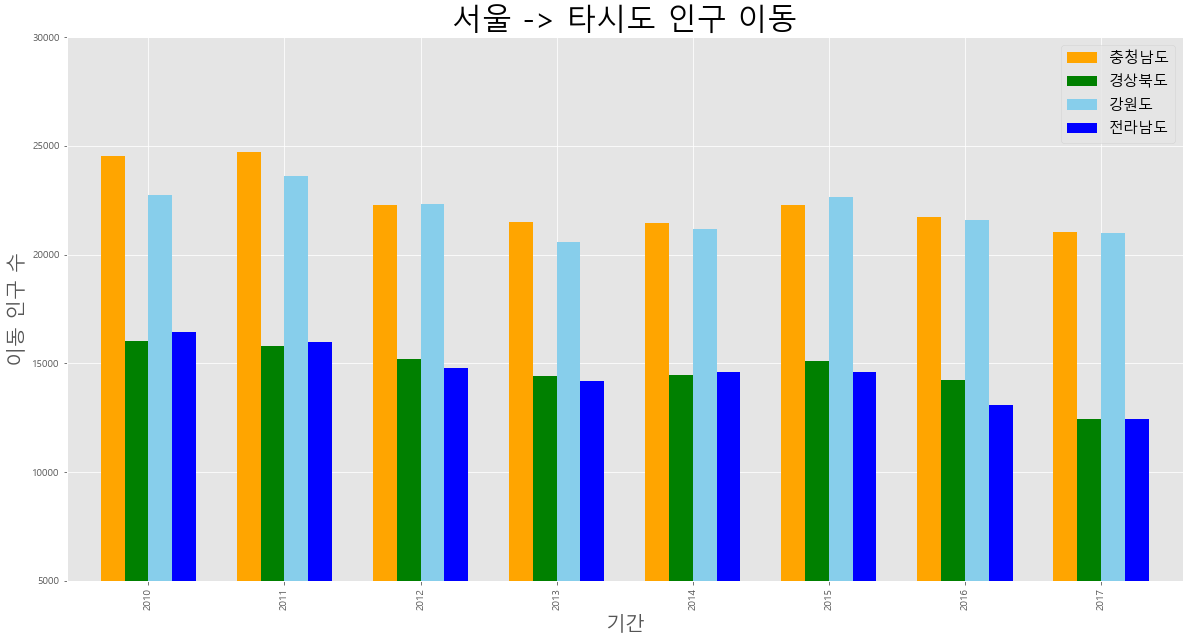

In [20]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

plt.style.use('ggplot')

df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
         color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

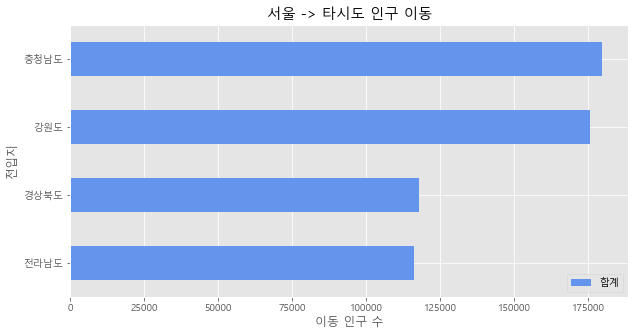

In [21]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

df_4['합계'] = df_4.sum(axis=1)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True) # 가장 큰 값부터 정렬

plt.style.use('ggplot')

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

> **보조 축 활용하기(2축 그래프 그리기)**  
> 
> 막대 그래프로 연도별 북한의 발전량, 선 그래프로 북한 발전량의 전년 대비 증감률 백분률로 나타내기

C:\Users\sumin\AppData\Local\Temp/ipykernel_18436/2690365416.py:13: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('남북한발전전력량.xlsx', convert_float=True)


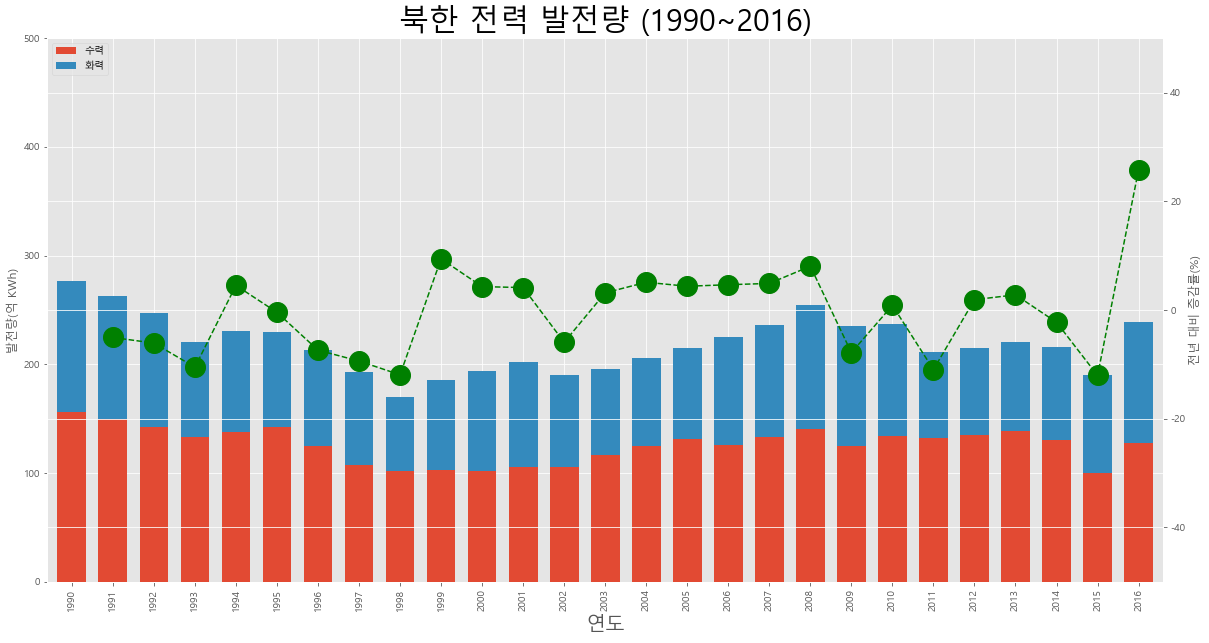

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

df = pd.read_excel('남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx() # ax1의 쌍둥이 객체 만들기
ax2.plot(df.index, df.증감률, ls = '--', marker='o', markersize=20,
        color='green', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

### 1-4. 히스토그램  

==> kind = 'hist' 옵션 추가  

단변수 데이터의 빈도수를 그래프로 표현

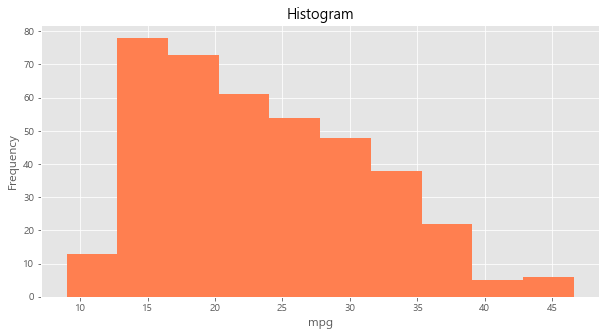

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5)) # bins: 구간의 수

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 1-5. 산점도

==> kind = 'scatter' 옵션 추가  
==> 선 그래프에서 plot메소드에 'o' 옵션을 사용  

서로 다른 두 변수 사이의 관계를 나타낸다.

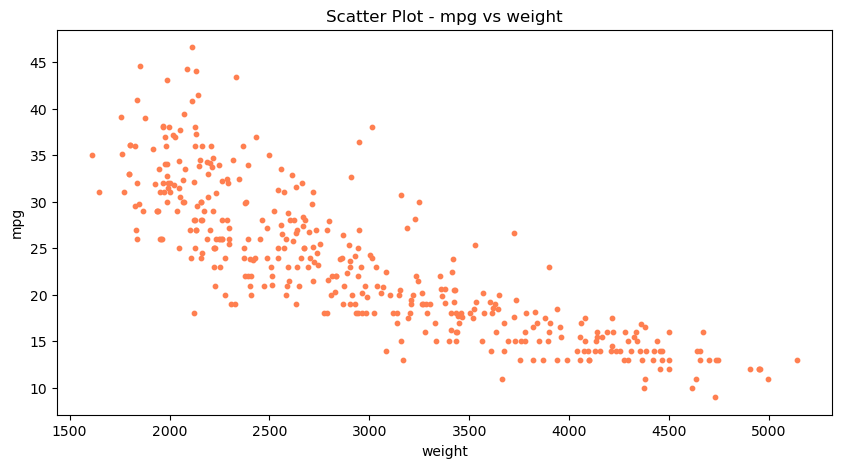

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

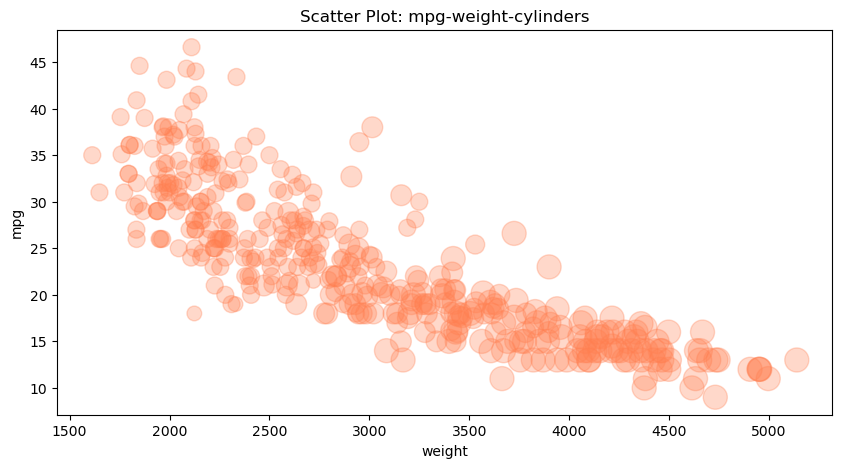

In [25]:
# 위 산점도에 새로운 변수를 추가해 점의 크기 또는 색상으로 표현 가능

cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5), s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

> **그래프를 그림 파일로 저장**  
>
> savefig() 함수에 저장하려는 파일의 이름, 파일 경로 설정

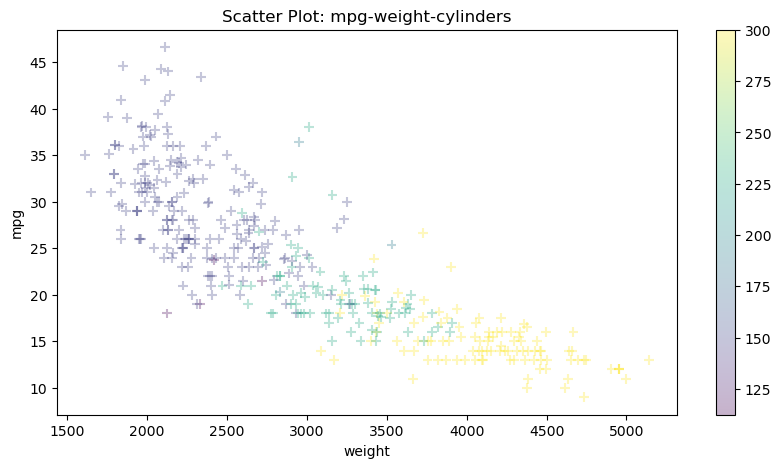

In [26]:
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', marker= '+', figsize=(10, 5), 
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3) # 값에 따라 다른 색상으로 표현, 컬러맵(cmap)으로 viridis 설정
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True) # 배경을 투명하게 지정

plt.show()

### 1-6. 파이 차트

==> kind = 'pie' 옵션 추가

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

# 데이터 개수를 세기 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


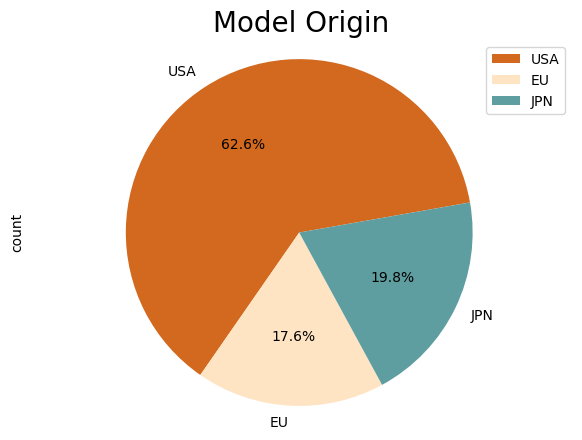

In [28]:
df_origin.index = ['USA', 'EU', 'JPN']


df_origin['count'].plot(kind='pie',
                       figsize=(7, 5),
                       autopct='%1.1f%%',        # 퍼센트 표시    
                       startangle=10,            # 파이 조각을 나누는 시작점(각도)
                       colors=['chocolate', 'bisque', 'cadetblue']) # 색상리스트

plt.title('Model Origin', size=20)
plt.axis('equal') # 파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

### 1-7. 박스 플롯

==> axe 객체에 박스 플롯을 그리는 boxplot() 메소드를 적용한다.

범주형 데이터의 분포를 파악하는데 적합하다.

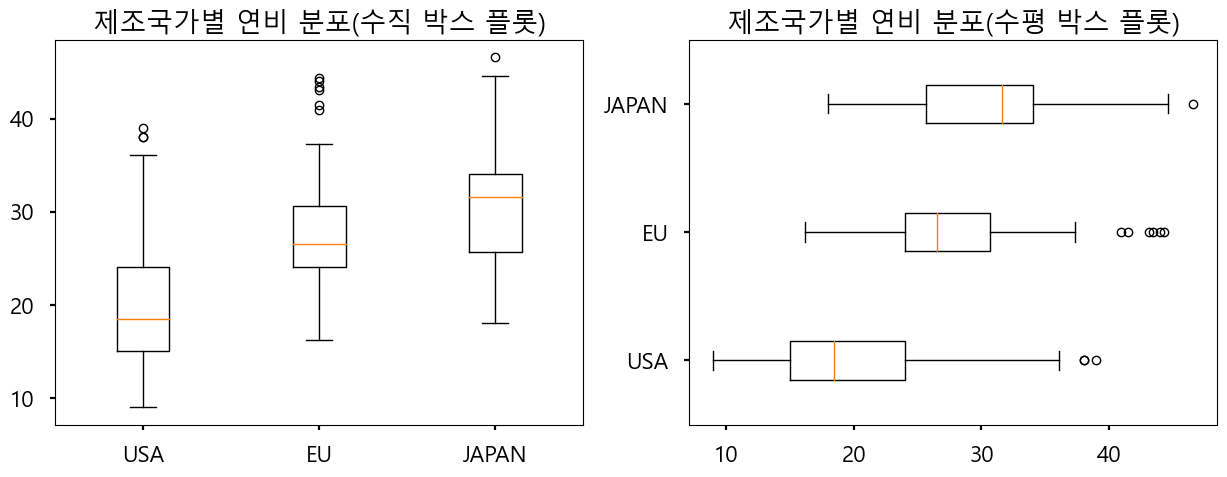

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['origin'] == 1]['mpg'],
           df[df['origin'] == 2]['mpg'],
           df[df['origin'] == 3]['mpg']],
           labels = ['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin'] == 1]['mpg'],
           df[df['origin'] == 2]['mpg'],
           df[df['origin'] == 3]['mpg']],
           labels = ['USA', 'EU', 'JAPAN'],
           vert = False) # 수평 박스 플롯 그리기

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

## 2. Seaborn 라이브러리 - 고급 그래프 도구

Seaborn: Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전  

* 데이터셋 가져오기

In [30]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

* 회귀선이 있는 산점도  

regplot() 함수는 회귀선을 함께 나타낸다.  
fit_reg = False 옵션: 회귀선을 안보이게 설정

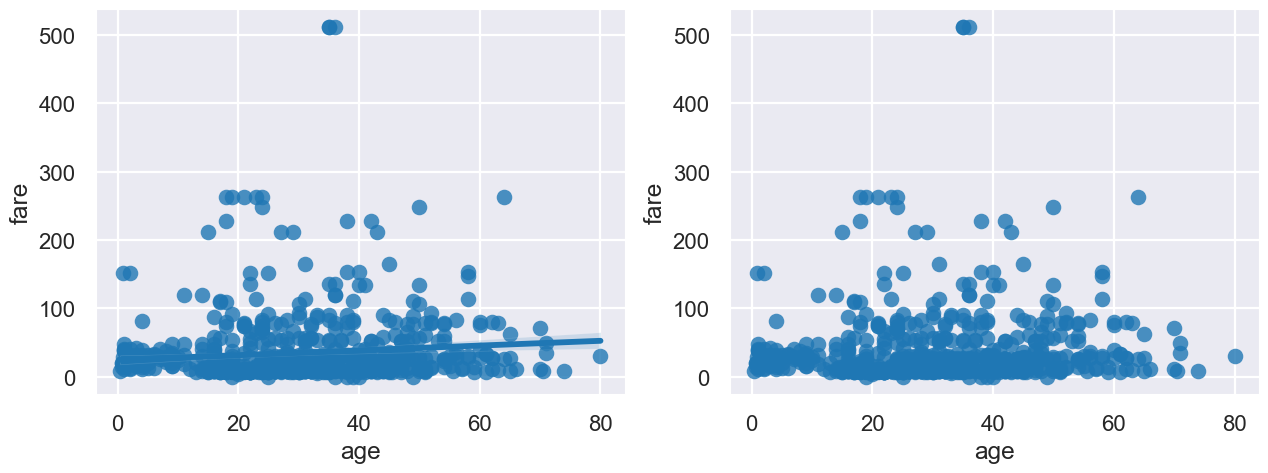

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 테마 설정(darkgrid, whitegrid, dark, white, ticks 5가지 존재)
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax1)

sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False) #회귀선 미표시

plt.show()

* 히스토그램/커널 밀도 그래프  

단변수 데이터의 분포를 확인할 때: distplot() 함수 이용  
hist = False 옵션: 히스토그램이 표시되지 않는다.  
kde = False 옵션: 커널 밀도 그래프를 표시하지 않는다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

Text(0.5, 1.0, 'titanic fare - hist')

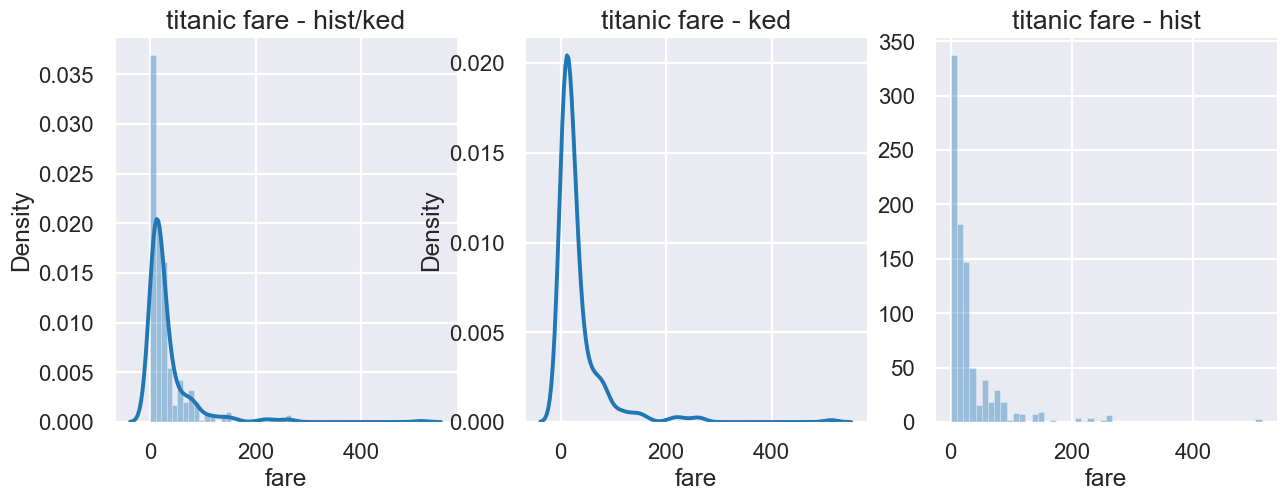

In [32]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1)
sns.distplot(titanic['fare'], hist=False, ax=ax2)
sns.distplot(titanic['fare'], kde=False, ax=ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

* 히트맵  

heatmap() 메소드 사용

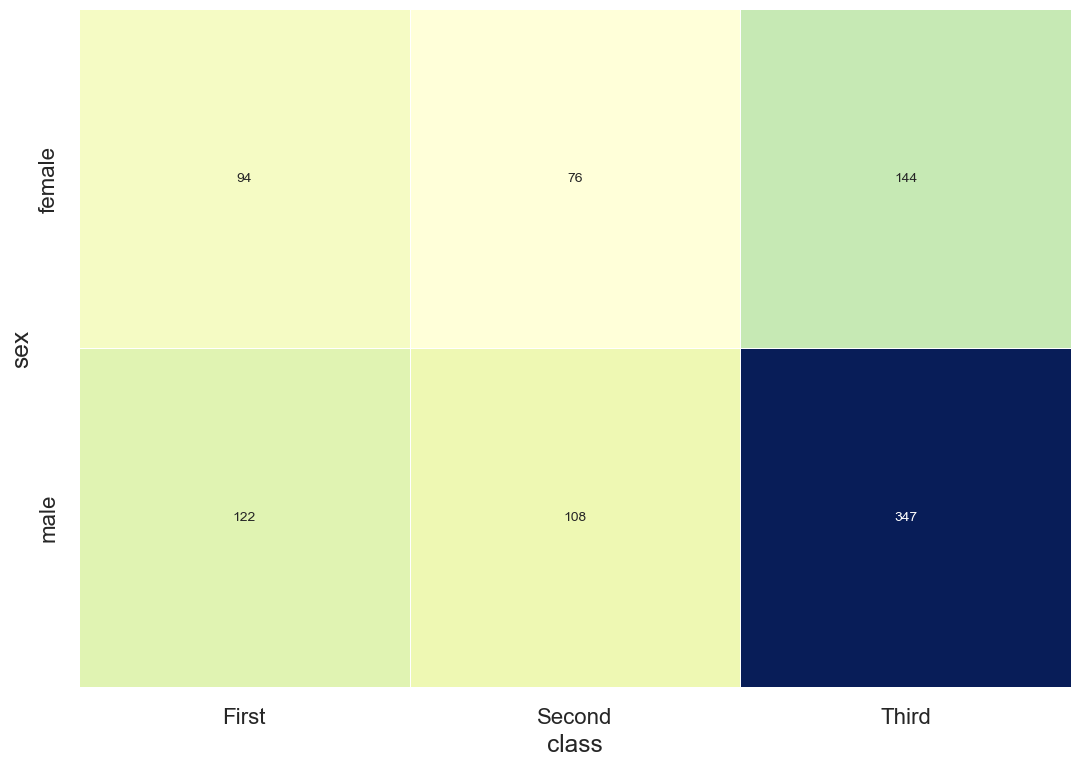

In [33]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size') # 데이터 값의 크기를 기준으로 집계

sns.heatmap(table, 
           annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
           cmap='YlGnBu',
           linewidth=.5,
           cbar=False) # 컬러 바 표시 여부

plt.show()

* 범주형 데이터의 산점도  

범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

stripplot(), swarmplot() 함수 사용 가능,  
swarmplot() 함수는 데이터의 분산까지 고려해 데이터 포인트가 서로 중복되지 않도록 그린다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


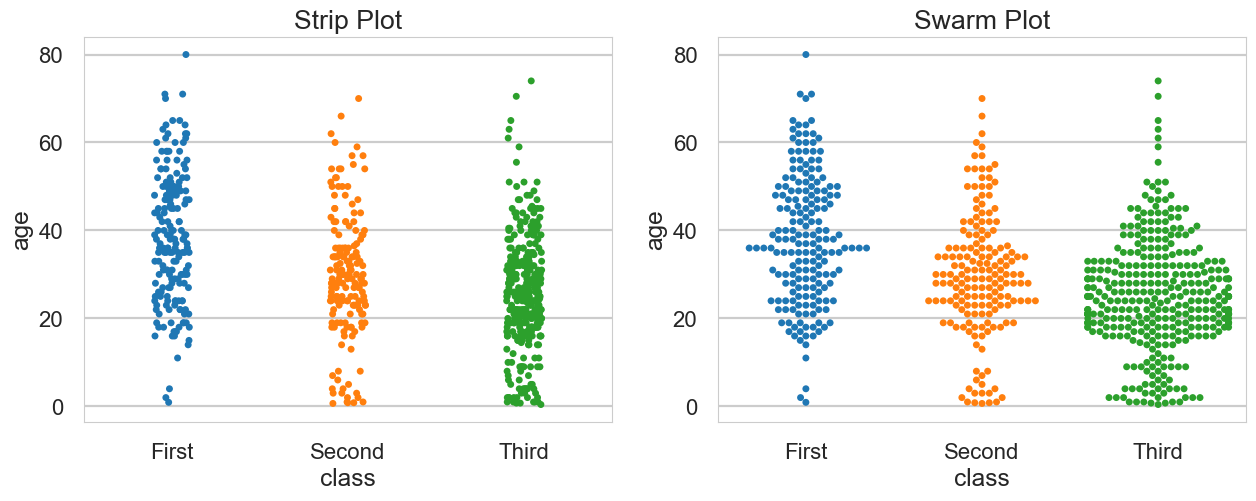

In [34]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(x='class',
           y='age',
           data=titanic,
           ax=ax1)

sns.swarmplot(x='class',
           y='age',
           data=titanic,
           ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

# hue='sex' 옵션 추가 하면 남녀 성별을 색상으로 구분해 출력한다.

* 막대 그래프

barplot() 함수 사용

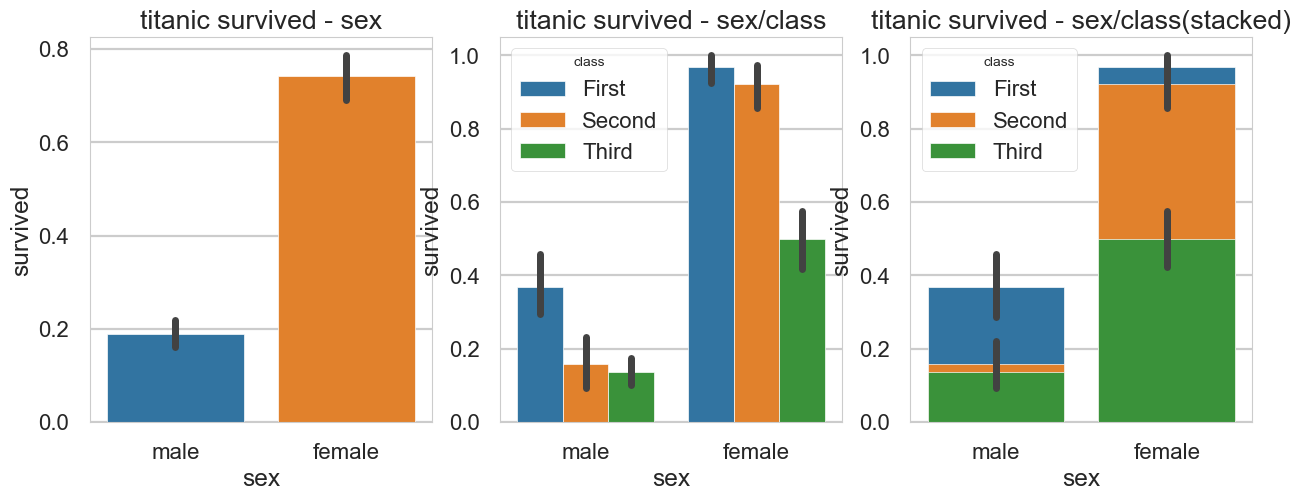

In [35]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3) # 누적

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

* 빈도 그래프

countplot() 함수 

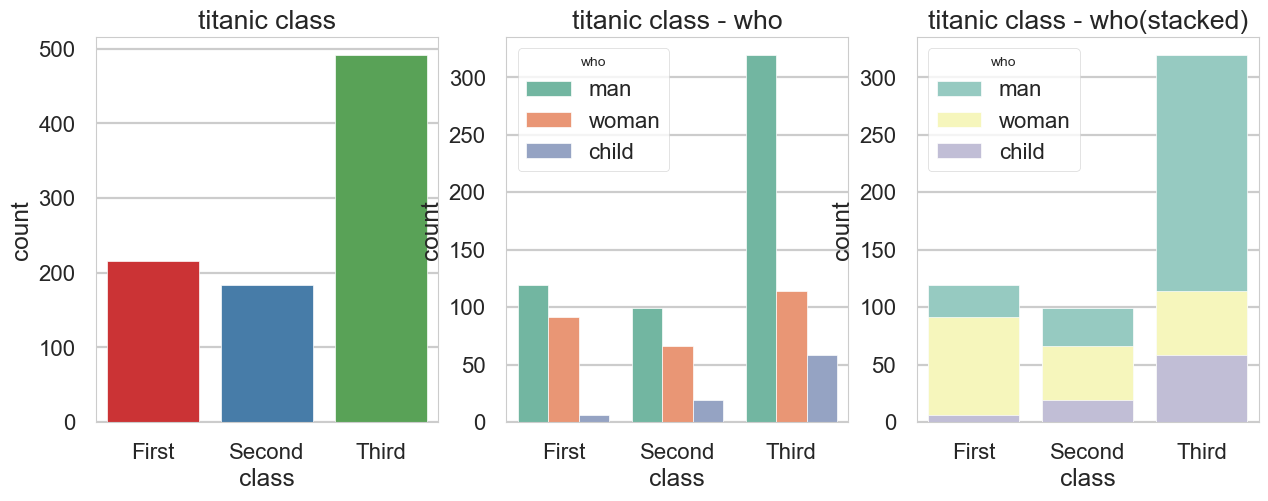

In [36]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)
# palette 옵션: 색 구성 설정

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

* 박스 플롯/바이올린 그래프

박스 플롯: boxplot()  
바이올린 그래프: violinplot()


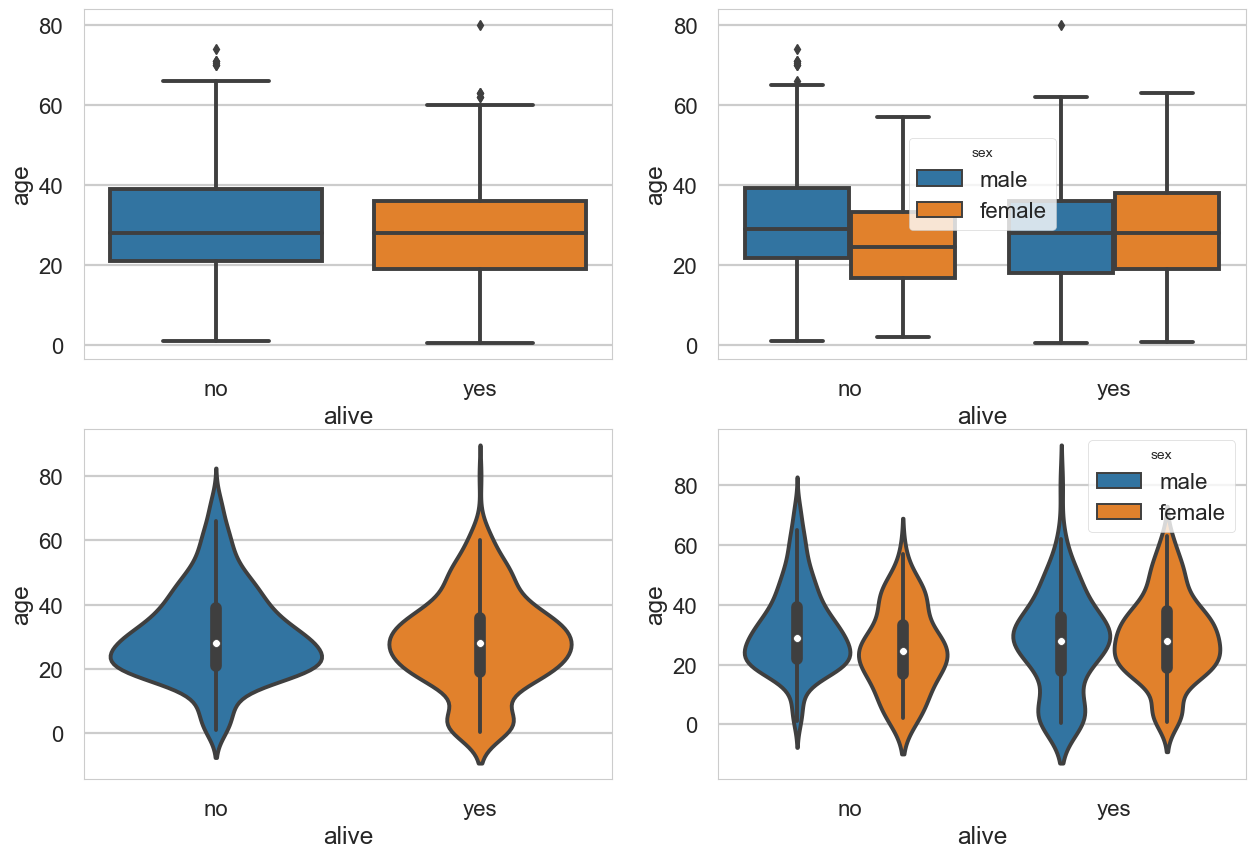

In [37]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

* 조인트 그래프

jointplot() 함수 사용

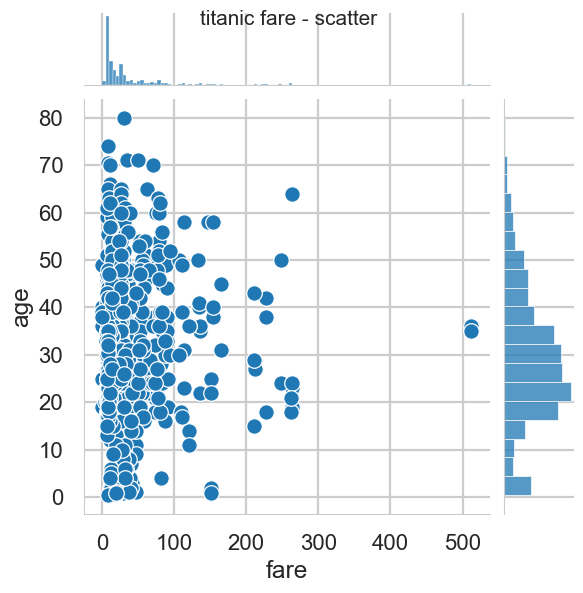

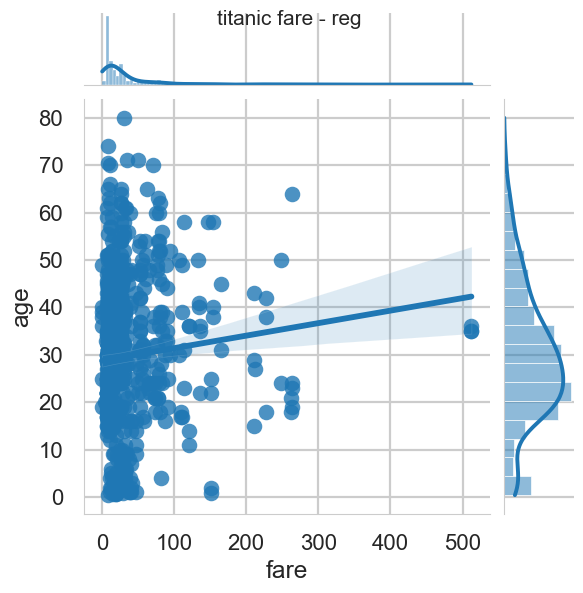

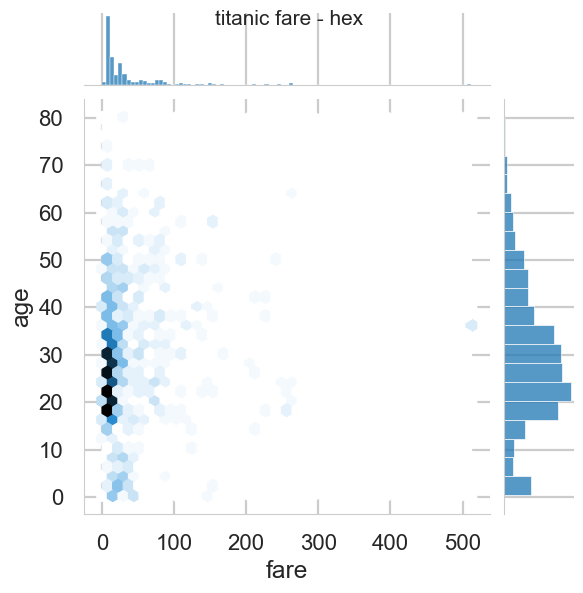

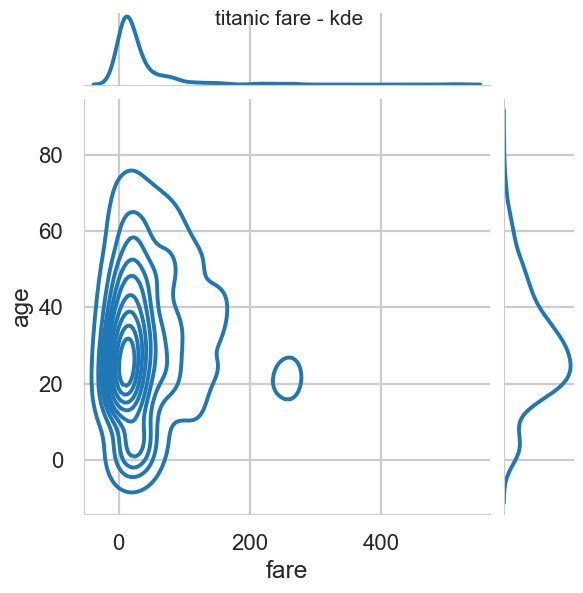

In [38]:
sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) # 회귀선 추가
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) # 육각 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) # 커널 밀집 그래프

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

* 조건을 적용하여 화면을 그리드로 분할하기

FacetGrid() 함수 사용해 여러 개의 서브 플롯 생성  

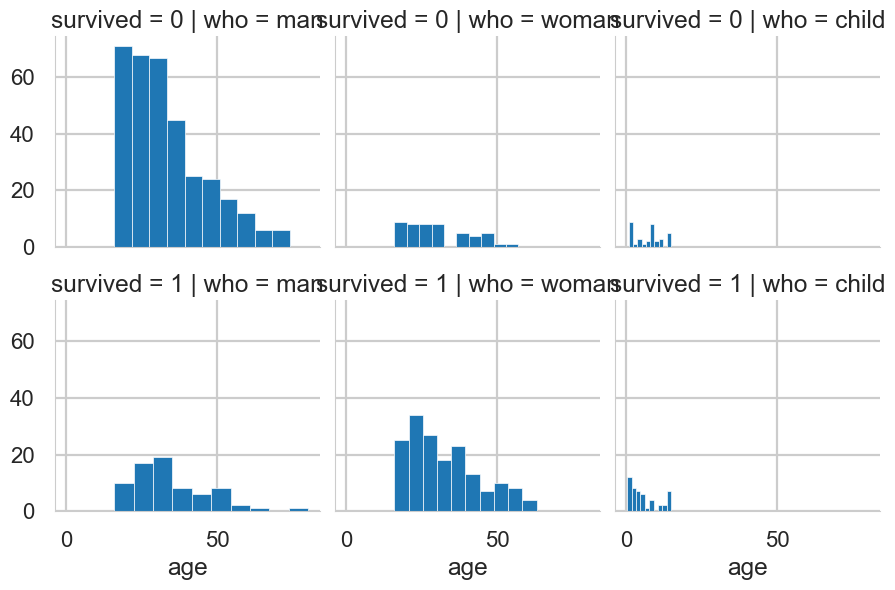

In [39]:
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age') # 그래프 적용

* 이변수 데이터의 분포

pairplot() 함수 사용  
: 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현

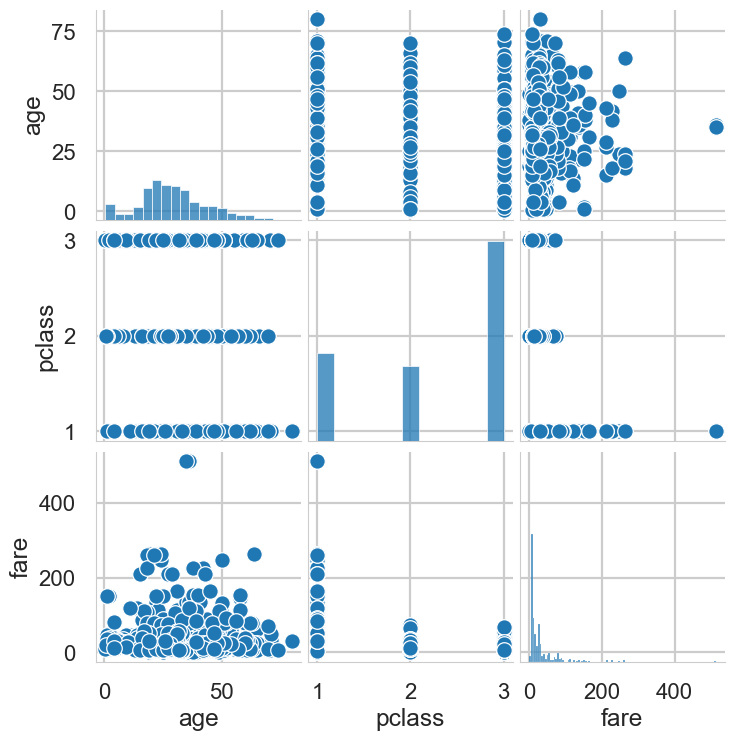

In [40]:
titanic_pair = titanic[['age', 'pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

## 3. Folium 라이브러리 - 지도 활용

* Folium 설치하기  
=> anaconda 프롬프트: conda install -c conda-forge folium

* 지도 만들기  

Folium 라이브러리의 Map() 함수 이용하기  
이 지도는 웹 기반 지도이기 때문에 웹 환경에서만 확인 가능  
  
IDE에서 작성한다면 save() 메소드를 이용해 HTML 파일로 저장해야 확인 가능

In [42]:
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12) # [위도, 경도], 화면 확대 비율

# 지도를 HTML 파일로 저장
seoul_map.save('seoul.html')

* 지도 스타일 적용

In [43]:
import folium

seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner',  # 흑백스타일
                        zoom_start=15)

seoul_map2.save('seoul2.html')
seoul_map3.save('seoul3.html')

* 지도에 마커 표시하기
  
Marker() 함수에 위도, 경도 정보 전달  
popup 옵션을 추가하면 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있다.

In [44]:
import pandas as pd
import folium

df = pd.read_excel('서울지역 대학교 위치.xlsx')

seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
    
seoul_map.save('seoul_colleges.html')

In [45]:
# 원형 마커 표시

import pandas as pd
import folium

df = pd.read_excel('서울지역 대학교 위치.xlsx')

seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng], 
                        radius=10,
                        color='brown',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,    # 투명도
                        popup=name).add_to(seoul_map)

seoul_map.save('seoul_colleges2.html')

* 지도 영역에 단계구분도(Choropleth Map) 표시하기  

행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법

In [47]:
import pandas as pd
import folium
import json

df = pd.read_excel('경기도인구데이터.xlsx', index_col='구분')
df.columns = df.columns.map(str)

geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982],
                  tiles='Stamen Terrain', zoom_start=9)

year = '2007'

folium.Choropleth(geo_data=geo_data,
                 data=df[year],
                 columns=[df.index, df[year]],
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

g_map.save('gyonggi_population_'+year+'.html')
